In [1]:
import numpy as np
from PIL import Image
import os
import random
from random import randint
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split


In [2]:
lookup = {}
reverselookup = {}
count = 0

# Iterate through food directories
for gesture_dir in os.listdir('D:\\prodigy\\task 5\\food-101\\images'):
    if not gesture_dir.startswith('.'): 
        lookup[gesture_dir] = count
        reverselookup[count] = gesture_dir
        count += 1

print("food Dictionary:")
print(lookup)

food Dictionary:
{'apple_pie': 0, 'baby_back_ribs': 1, 'baklava': 2, 'beef_carpaccio': 3, 'beef_tartare': 4, 'beet_salad': 5, 'beignets': 6, 'bibimbap': 7, 'bread_pudding': 8, 'breakfast_burrito': 9, 'bruschetta': 10, 'caesar_salad': 11, 'cannoli': 12, 'caprese_salad': 13, 'carrot_cake': 14, 'ceviche': 15, 'cheesecake': 16, 'cheese_plate': 17, 'chicken_curry': 18, 'chicken_quesadilla': 19, 'chicken_wings': 20, 'chocolate_cake': 21, 'chocolate_mousse': 22, 'churros': 23, 'clam_chowder': 24, 'club_sandwich': 25, 'crab_cakes': 26, 'creme_brulee': 27, 'croque_madame': 28, 'cup_cakes': 29, 'deviled_eggs': 30, 'donuts': 31, 'dumplings': 32, 'edamame': 33, 'eggs_benedict': 34, 'escargots': 35, 'falafel': 36, 'filet_mignon': 37, 'fish_and_chips': 38, 'foie_gras': 39, 'french_fries': 40, 'french_onion_soup': 41, 'french_toast': 42, 'fried_calamari': 43, 'fried_rice': 44, 'frozen_yogurt': 45, 'garlic_bread': 46, 'gnocchi': 47, 'greek_salad': 48, 'grilled_cheese_sandwich': 49, 'grilled_salmon': 5

In [16]:
x_data = []
y_data = []
datacount = 0
z=lookup.keys()
for i in z:   
    count = 0 
    for k in os.listdir('D:\\prodigy\\task 5\\food-101\\images\\' + str(i)):    
        img = Image.open('D:\\prodigy\\task 5\\food-101\\images\\' + str(i) + '/' + k)
               
        img = img.resize((224, 224))
        arr = np.array(img)
        if arr.shape == (224, 224, 3):  # Assuming RGB images
            x_data.append(arr)
            count += 1
        else:
            print(f"Ignoring {k} due to inconsistent dimensions: {arr.shape}")
            print(f"Full path: {'D:/prodigy/task 5/food-101/images/' + str(i) + '/' + k}")
#         x_data.append(arr)
#         count += 1
    y_values = np.full((count, 1), lookup[i])
    y_data.extend(y_values)
    datacount += count 



Ignoring 3787908.jpg due to inconsistent dimensions: (224, 224)
Full path: D:/prodigy/task 5/food-101/images/lasagna/3787908.jpg


In [17]:
x_data = np.array(x_data, dtype='float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) 

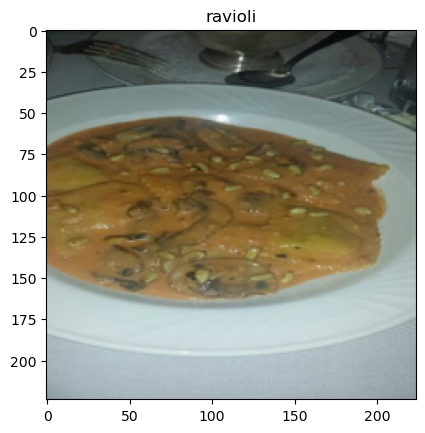

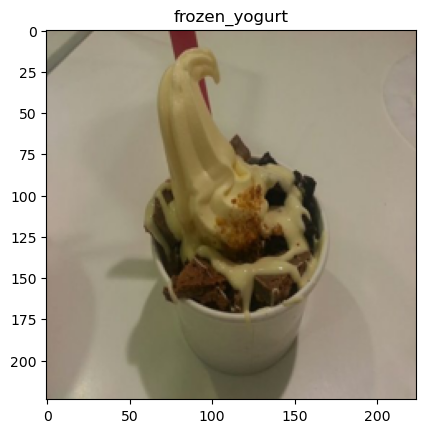

In [18]:

num_images = 2
num_samples = len(x_data)

for _ in range(num_images):
    index = randint(0, num_samples - 1)  
    plt.imshow(x_data[index] / 255.0, cmap='gray') 
    plt.title(reverselookup[y_data[index, 0]])  
    plt.show()

In [20]:
import numpy as np
from skimage.color import rgb2gray

print("Original shape of x_data:", x_data.shape)

# Convert RGB images to grayscale
x_data_gray = np.zeros((x_data.shape[0], 224, 224))

for i in range(x_data.shape[0]):
    x_data_gray[i] = rgb2gray(x_data[i])


desired_shape = (x_data_gray.shape[0], 224, 224, 1)


total_elements = np.prod(x_data_gray.shape)
desired_elements = np.prod(desired_shape)

if total_elements == desired_elements:
    x_data_gray = x_data_gray.reshape(desired_shape)
    print("Reshaped x_data shape:", x_data_gray.shape)
    x_data_gray /= 255 
    print("Normalized pixel values for the first image:\n", x_data_gray[0])
else:
    print("Cannot reshape array due to mismatch in total elements.")


Original shape of x_data: (20199, 224, 224, 3)
Reshaped x_data shape: (20199, 224, 224, 1)
Normalized pixel values for the first image:
 [[[0.11721372]
  [0.12365803]
  [0.11945373]
  ...
  [0.1326549 ]
  [0.11304706]
  [0.10912549]]

 [[0.13934432]
  [0.11973647]
  [0.11973647]
  ...
  [0.12481176]
  [0.1208902 ]
  [0.1208902 ]]

 [[0.1158149 ]
  [0.10012863]
  [0.14214982]
  ...
  [0.12481176]
  [0.12481176]
  [0.1208902 ]]

 ...

 [[0.64334465]
  [0.64334465]
  [0.64726628]
  ...
  [0.51980393]
  [0.5237255 ]
  [0.5119608 ]]

 [[0.64334465]
  [0.64334465]
  [0.64726628]
  ...
  [0.51980393]
  [0.52764707]
  [0.51588236]]

 [[0.63550152]
  [0.63942315]
  [0.64726628]
  ...
  [0.52764707]
  [0.51588236]
  [0.51588236]]]


In [13]:
y_data = to_categorical(y_data)
y_data

In [21]:
x_train, x_further, y_train, y_further = train_test_split(x_data, y_data, test_size=0.2)
x_validate, x_test, y_validate, y_test = train_test_split(x_further, y_further, test_size=0.5)

In [25]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 101
EPOCHS = 10
DATA_DIR = "D:\\prodigy\\task 5\\food-101\\images"

In [26]:
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # Splitting data into training and validation


In [27]:
data_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training')  # This is the training data

Found 16160 images belonging to 101 classes.


In [29]:
validation_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation')  # This is the validation data

Found 4040 images belonging to 101 classes.


In [18]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [23]:
history=model.fit(
    data_generator,
    steps_per_epoch=data_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Save the model
model.save("food_classification_model.h5")

Epoch 1/10


505/505 [==============================] - 544s 1s/step - loss: 4.5730 - accuracy: 0.0184 - val_loss: 4.4808 - val_accuracy: 0.0315
Epoch 2/10
505/505 [==============================] - 547s 1s/step - loss: 4.3562 - accuracy: 0.0459 - val_loss: 4.2315 - val_accuracy: 0.0692
Epoch 3/10
505/505 [==============================] - 527s 1s/step - loss: 4.1258 - accuracy: 0.0778 - val_loss: 4.1347 - val_accuracy: 0.0724
Epoch 4/10
505/505 [==============================] - 530s 1s/step - loss: 3.9321 - accuracy: 0.1093 - val_loss: 4.0723 - val_accuracy: 0.0885
Epoch 5/10
505/505 [==============================] - 519s 1s/step - loss: 3.7426 - accuracy: 0.1371 - val_loss: 4.0143 - val_accuracy: 0.1027
Epoch 6/10
505/505 [==============================] - 539s 1s/step - loss: 3.5282 - accuracy: 0.1767 - val_loss: 4.0051 - val_accuracy: 0.1173
Epoch 7/10
505/505 [==============================] - 535s 1s/step - loss: 3.2749 - accuracy: 0.2256 - val_loss: 3.9749 - val_accuracy: 0.11

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


64/64 [==============================] - 8s 115ms/step


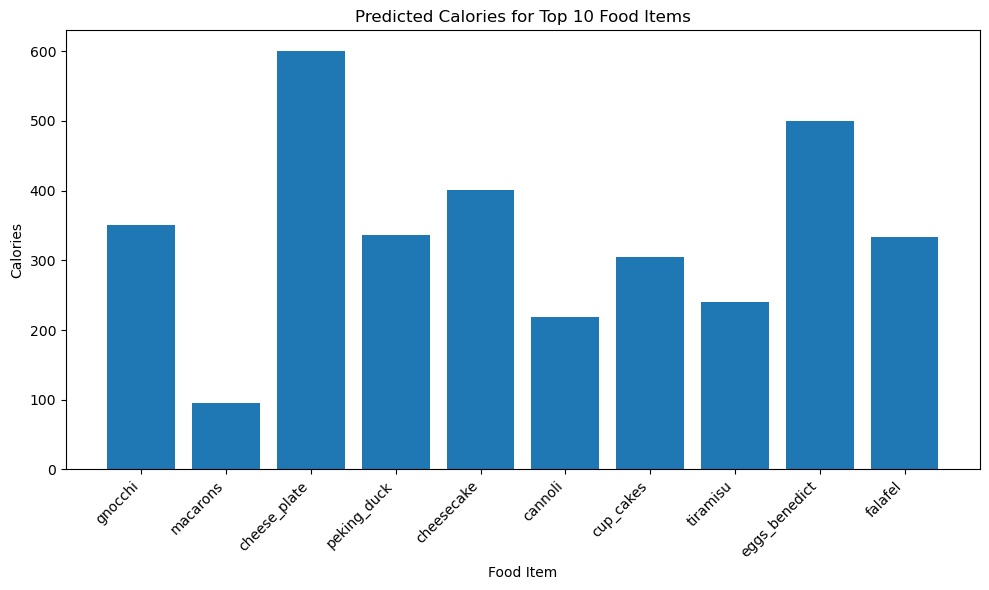

In [24]:
from tensorflow.keras.models import load_model

food_item_names = ["apple_pie", "baby_back_ribs", "baklava", "beef_carpaccio", "beef_tartare",
    "beet_salad", "beignets", "bibimbap", "bread_pudding", "breakfast_burrito",
    "bruschetta", "caesar_salad", "cannoli", "caprese_salad", "carrot_cake",
    "ceviche", "cheesecake", "cheese_plate", "chicken_curry", "chicken_quesadilla",
    "chicken_wings", "chocolate_cake", "chocolate_mousse", "churros", "clam_chowder",
    "club_sandwich", "crab_cakes", "creme_brulee", "croque_madame", "cup_cakes",
    "deviled_eggs", "donuts", "dumplings", "edamame", "eggs_benedict", "escargots",
    "falafel", "filet_mignon", "fish_and_chips", "foie_gras", "french_fries",
    "french_onion_soup", "french_toast", "fried_calamari", "fried_rice", "frozen_yogurt",
    "garlic_bread", "gnocchi", "greek_salad", "grilled_cheese_sandwich", "grilled_salmon",
    "guacamole", "gyoza", "hamburger", "hot_and_sour_soup", "hot_dog", "huevos_rancheros",
    "hummus", "ice_cream", "lasagna", "lobster_bisque", "lobster_roll_sandwich",
    "macaroni_and_cheese", "macarons", "miso_soup", "mussels", "nachos", "omelette",
    "onion_rings", "oysters", "pad_thai", "paella", "pancakes", "panna_cotta",
    "peking_duck", "pho", "pizza", "pork_chop", "poutine", "prime_rib",
    "pulled_pork_sandwich", "ramen", "ravioli", "red_velvet_cake", "risotto",
    "samosa", "sashimi", "scallops", "seaweed_salad", "shrimp_and_grits",
    "spaghetti_bolognese", "spaghetti_carbonara", "spring_rolls", "steak",
    "strawberry_shortcake", "sushi", "tacos", "takoyaki", "tiramisu", "tuna_tartare",
    "waffles"]

class_to_food_item = {i: food_item_names[i] for i in range(len(food_item_names))}


model = load_model('food_classification_model.h5')

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

calorie_dict = {
    'apple_pie': 237,
    'baby_back_ribs': 292,
    'baklava': 334,
    'beef_carpaccio': 122,
    'beef_tartare': 192,
    'beet_salad': 148,
    'beignets': 289,
    'bibimbap': 583,
    'bread_pudding': 291,
    'breakfast_burrito': 305,
    'bruschetta': 120,
    'caesar_salad': 481,
    'cannoli': 218,
    'caprese_salad': 235,
    'carrot_cake': 326,
    'ceviche': 142,
    'cheesecake': 401,
    'cheese_plate': 600,
    'chicken_curry': 293,
    'chicken_quesadilla': 460,
    'chicken_wings': 203,
    'chocolate_cake': 352,
    'chocolate_mousse': 355,
    'churros': 237,
    'clam_chowder': 200,
    'club_sandwich': 320,
    'crab_cakes': 250,
    'creme_brulee': 262,
    'croque_madame': 500,
    'cup_cakes': 305,
    'deviled_eggs': 64,
    'donuts': 452,
    'dumplings': 138,
    'edamame': 120,
    'eggs_benedict': 500,
    'escargots': 170,
    'falafel': 333,
    'filet_mignon': 275,
    'fish_and_chips': 595,
    'foie_gras': 446,
    'french_fries': 365,
    'french_onion_soup': 369,
    'french_toast': 280,
    'fried_calamari': 150,
    'fried_rice': 238,
    'frozen_yogurt': 214,
    'garlic_bread': 206,
    'gnocchi': 350,
    'greek_salad': 220,
    'grilled_cheese_sandwich': 287,
    'grilled_salmon': 412,
    'guacamole': 240,
    'gyoza': 200,
    'hamburger': 354,
    'hot_and_sour_soup': 95,
    'hot_dog': 290,
    'huevos_rancheros': 359,
    'hummus': 166,
    'ice_cream': 207,
    'lasagna': 290,
    'lobster_bisque': 248,
    'lobster_roll_sandwich': 436,
    'macaroni_and_cheese': 310,
    'macarons': 95,
    'miso_soup': 40,
    'mussels': 146,
    'nachos': 346,
    'omelette': 154,
    'onion_rings': 280,
    'oysters': 50,
    'pad_thai': 357,
    'paella': 300,
    'pancakes': 227,
    'panna_cotta': 350,
    'peking_duck': 337,
    'pho': 290,
    'pizza': 285,
    'pork_chop': 221,
    'poutine': 740,
    'prime_rib': 400,
    'pulled_pork_sandwich': 415,
    'ramen': 436,
    'ravioli': 230,
    'red_velvet_cake': 350,
    'risotto': 166,
    'samosa': 262,
    'sashimi': 200,
    'scallops': 75,
    'seaweed_salad': 106,
    'shrimp_and_grits': 250,
    'spaghetti_bolognese': 344,
    'spaghetti_carbonara': 379,
    'spring_rolls': 150,
    'steak': 679,
    'strawberry_shortcake': 285,
    'sushi': 130,
    'tacos': 226,
    'takoyaki': 342,
    'tiramisu': 240,
    'tuna_tartare': 170,
    'waffles': 310
}
predicted_food_items = [class_to_food_item[class_index] for class_index in predicted_classes]
predicted_calories = [calorie_dict[food_item] for food_item in predicted_food_items]

plt.figure(figsize=(10, 6))
plt.bar(predicted_food_items[:10], predicted_calories[:10])
plt.xlabel('Food Item')
plt.ylabel('Calories')
plt.title('Predicted Calories for Top 10 Food Items')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



1/1 [==============================] - 0s 177ms/step


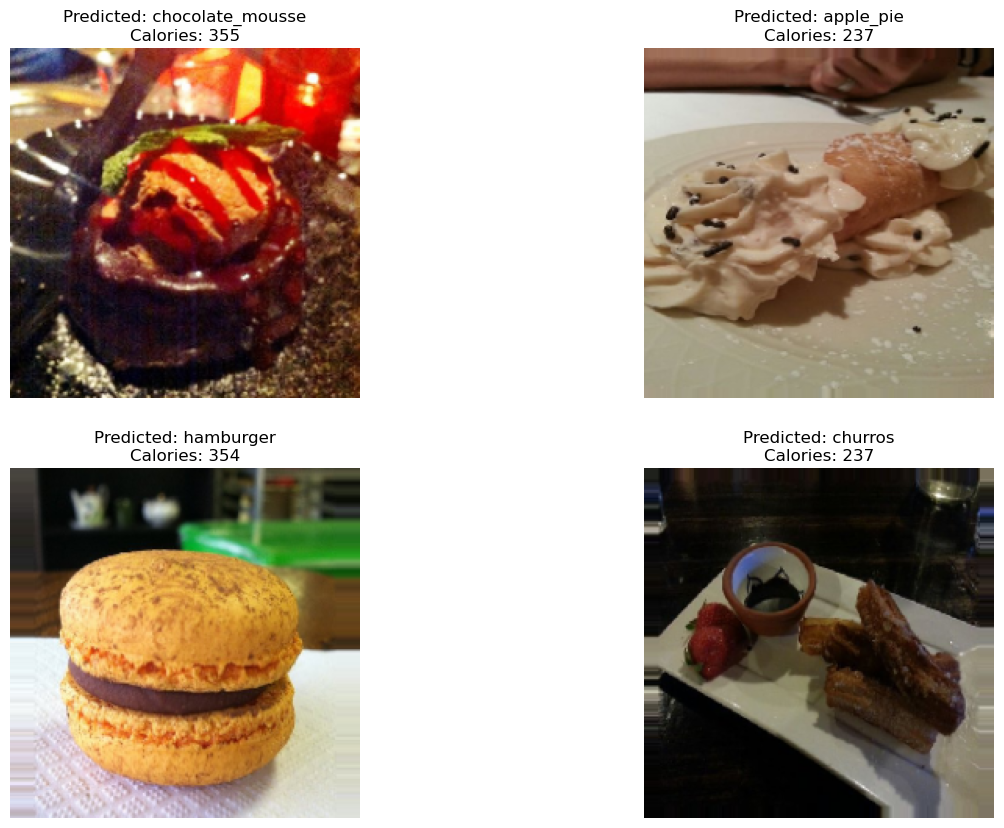

In [33]:
import matplotlib.pyplot as plt

images, labels = validation_generator.next()

predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)

predicted_food_items = [class_to_food_item[class_index] for class_index in predicted_classes]
predicted_calories = [calorie_dict[food_item] for food_item in predicted_food_items]

plt.figure(figsize=(15, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i])
    plt.title(f'Predicted: {predicted_food_items[i]}\nCalories: {predicted_calories[i]}')
    plt.axis('off')
plt.show()
